### Hotels-50K dataset Summary

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
labels = ['Train', 'Test']
hotel_website = [1079585, 0]
traffickcam = [44630, 16172]

In [109]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        
def plot_lines(ytr, yval, ytest, ymetric):
    # plotting the line 1 points 
    plt.plot(range(len(ytr)), ytr, label = "training")
    # plotting the line 2 points 
    plt.plot(range(len(yval)), yval, label = "validation")
    if ytest is not None:
        #show test value
        plt.title(f'{ymetric}; Test {ymetric}={ytest[0]:.6f}')
    else:
        plt.title(f'{ymetric}')
        
    plt.xlabel('epochs')
    # Set the y axis label of the current axis.
    plt.ylabel(ymetric)
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    plt.show()
    
    
def get_metrics(filename_prefix, metric='accuracy', test_exists = True, folder='../pytorch/results/'):
    df_tr = pd.read_csv(folder+filename_prefix+'_tr.csv')
    df_val = pd.read_csv(folder+filename_prefix+'_val.csv')
    df_test = None
    if test_exists:
        df_test = pd.read_csv(folder+filename_prefix+'_test.csv')
    
    ytr = df_tr[metric]
    yval = df_val[metric]
    try:
        ytest = df_test[metric]
    except:
        ytest = None
    
    return ytr, yval, ytest

def grad_cam(model):
    image_file = './testimages/3946917.jpg'
    img = plt.imread(image_file)
    img = transforms.ToPILImage()(img)
    img = transformations(img)
    img = img.unsqueeze(0)
    img = img.to(device)
    res = cam_model.forward(img)
    pred = res.argmax(dim=1)

    res[:,pred.item()].backward()

    res, pred

In [124]:
def get_conf_matrix(filename_prefix, folder='../pytorch/results/', test_exists=True):
    df_tr = pd.read_csv(folder+filename_prefix+'_tr.csv')
    df_val = pd.read_csv(folder+filename_prefix+'_val.csv')
    df_test = None
    
    if test_exists:
        df_test = pd.read_csv(folder+filename_prefix+'_test.csv')
    
    confval = df_val[df_val['saved'] == True ]
    conftr = df_tr.iloc[-1]
    
    confval = confval.iloc[-1]
    a = conftr[['tn','fp','fn','tp', 'precision_1', 'recall_1', 'f1_1']]
    b = confval[['tn','fp','fn','tp', 'precision_1', 'recall_1', 'f1_1']]
    a.name = 'training'
    b.name = 'validation'
    
    conf_df = pd.merge(a, b, right_index = True, left_index = True) 
    
    if df_test is not None:
        conftest = df_test.iloc[-1]
        c = conftest[['tn','fp','fn','tp', 'precision_1', 'recall_1', 'f1_1']]
        c.name = 'test'
        conf_df = conf_df.join(c) 

    return conf_df
 

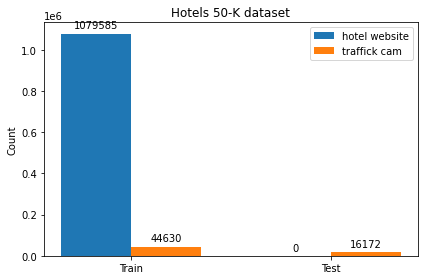

In [61]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hotel_website, width, label='hotel website')
rects2 = ax.bar(x + width/2, traffickcam, width, label='traffick cam')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Hotels 50-K dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### UK/Not UK Experiments

### 1. Very Small unbalanced dataset (to test weight balancing)

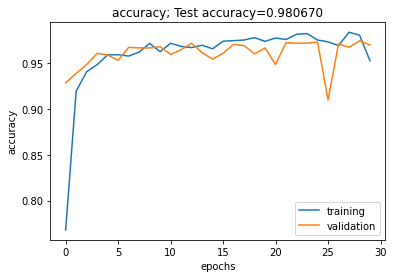

In [118]:
prefix = 'small_unbalanced'
ytr, yval, ytest = get_metrics(prefix, 'accuracy')
plot_lines(ytr, yval, ytest , 'accuracy')

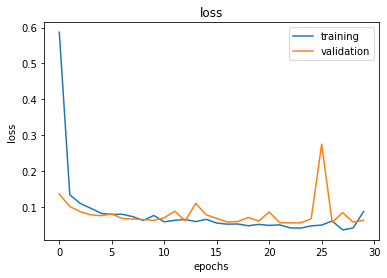

In [119]:
ytr, yval, ytest = get_metrics(prefix, 'loss')
plot_lines(ytr, yval, ytest , 'loss')

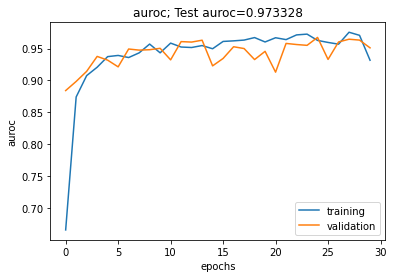

In [120]:
ytr, yval, ytest = get_metrics(prefix, 'auroc')
plot_lines(ytr, yval, ytest , 'auroc')

In [125]:
get_conf_matrix(prefix)

,training,validation,test
tn,3728.000000,1090,521.000000
fp,59.000000,5,3.000000
fn,199.000000,39,12.000000
tp,1443.000000,417,240.000000
precision_1,0.960719,0.988152,0.987654
recall_1,0.878806,0.914474,0.952381
f1_1,0.917939,0.949886,0.969697


### 2. Balanced test and validation from traffic Cam

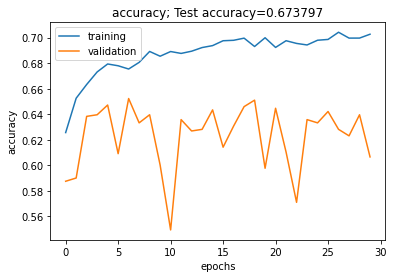

In [126]:
prefix = 'uk_not_uk_classifier_balanced_distrib'
ytr, yval, ytest = get_metrics(prefix, 'accuracy')
plot_lines(ytr, yval, ytest , 'accuracy')

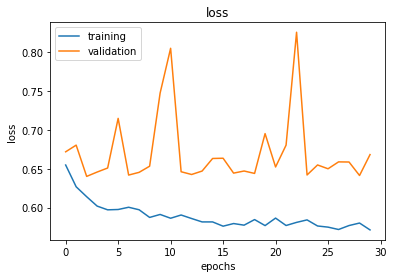

In [127]:
ytr, yval, ytest = get_metrics(prefix, 'loss')
plot_lines(ytr, yval, ytest , 'loss')

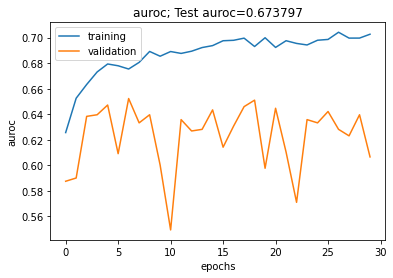

In [128]:
ytr, yval, ytest = get_metrics(prefix, 'auroc')
plot_lines(ytr, yval, ytest , 'auroc')

In [129]:
get_conf_matrix(prefix)

,training,validation,test
tn,21185.000000,224,107.000000
fp,9122.000000,170,80.000000
fn,8905.000000,115,42.000000
tp,21402.000000,279,145.000000
precision_1,0.701153,0.621381,0.644444
recall_1,0.706173,0.708122,0.775401
f1_1,0.703654,0.661922,0.703883


### 3. Full unbalanced dataset + weighted loss

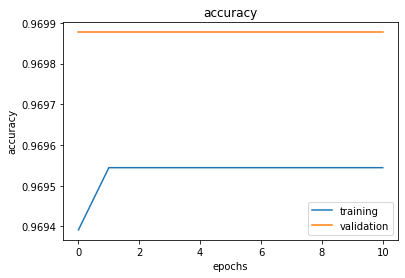

In [130]:
prefix = 'unbalanced_uk_not_uk_classifier'
ytr, yval, ytest = get_metrics(prefix, 'accuracy',test_exists = False)
plot_lines(ytr, yval, ytest , 'accuracy')

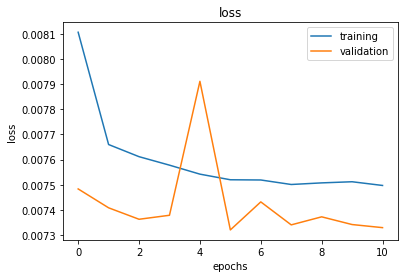

In [131]:
ytr, yval, ytest = get_metrics(prefix, 'loss',test_exists = False)
plot_lines(ytr, yval, ytest , 'loss')

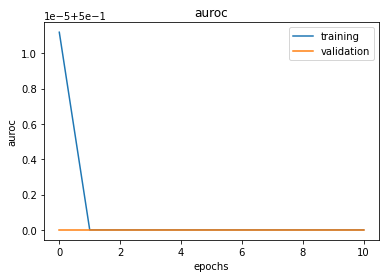

In [132]:
ytr, yval, ytest = get_metrics(prefix, 'auroc',test_exists = False)
plot_lines(ytr, yval, ytest , 'auroc')

In [133]:
get_conf_matrix(prefix, test_exists = False)

,training,validation
tn,685147.0,195823
fp,0.0,0
fn,21522.0,6082
tp,0.0,0
precision_1,0.0,0
recall_1,0.0,0
f1_1,0.0,0
